<a href="https://colab.research.google.com/github/kvs1998/Kaggle/blob/main/RickAndMorty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andradaolteanu/rickmorty-scripts

Saving kaggle.json to kaggle.json
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 92.1MB/s]


In [2]:
! mkdir train
! unzip /content/rickmorty-scripts.zip -d train

Archive:  /content/rickmorty-scripts.zip
  inflating: train/RickAndMortyScripts.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import nltk

from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
data = pd.read_csv('/content/train/RickAndMortyScripts.csv')
data.head()

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."


In [5]:
data.tail()

,index,season no.,episode no.,episode name,name,line
1900,2483,3,7,Tales From the Citadel,Morty,That was amazing!
1901,2484,3,7,Tales From the Citadel,Rick,Got some of that mermaid puss!
1902,2485,3,7,Tales From the Citadel,Morty,I'm really hoping it wasn't a one-off thing an...
1903,2486,3,7,Tales From the Citadel,Rick,"Pssh! Not at all, Morty. That place will never..."
1904,2487,3,7,Tales From the Citadel,Morty,"Whoo! Yeah! Yeaah! Ohhh, shit!"


In [6]:
#Number of episodes in each season in dataset
data[['season no.','episode no.']].groupby('season no.').max()

,episode no.
season no.,
1,6
2,10
3,7


Clean the text 
1. Remove punctuation
2. strip whitespace
3. Lower case
4. remove stopwords
5. remove numbers

In [7]:
#Clean the text
def CleanText(text):
  text = re.sub(r'[^a-z\s]','', text.lower())
  return text
#Remove Stopwords
def RemoveStopwords(text):
  text_tokens = word_tokenize(text)
  text_tokens = tuple([word for word in text_tokens if not word in stopwords.words()]) 
  return text_tokens
data['text'] = data['line'].apply(lambda x: CleanText(x))  
data['text'] = data['text'].apply(lambda x: RemoveStopwords(x))  
print(data['text'][0])
print(data['line'][0])

('morty', 'got', 'jus', 'got')
Morty! You gotta come on. Jus'... you gotta come with me.


In [8]:
def generateNGrams(text_list, n):
  ngrams_list = []
  for sent in text_list:  
    for i in range(0, len(sent)-n+1):
        ngrams_list.append(sent[i:i+n])
  return ngrams_list  

In [9]:
three_gram = generateNGrams(data['text'], 3)
two_gram = generateNGrams(data['text'], 2)
one_gram = generateNGrams(data['text'], 1)

In [10]:
three_gram[:3]

[('morty', 'got', 'jus'), ('got', 'jus', 'got'), ('rick', 'whats', 'going')]

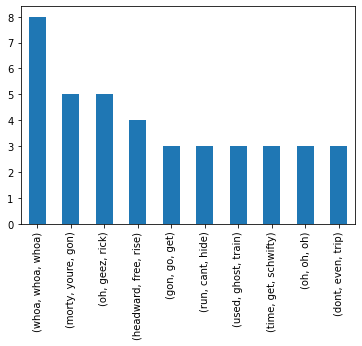

In [23]:
df=pd.DataFrame({'three_gram': three_gram})
df['three_gram'].value_counts()[:10].plot(kind='bar')


In [28]:
#max dialogues
data['name'].value_counts()[:8]

Rick           420
Morty          347
Beth           148
Jerry          132
Summer          97
Pickle Rick     77
Supernova       44
Cop Morty       34
Name: name, dtype: int64

In [30]:
data[data['name']=='Jerry']['text']

37      (see, theres, new, episode, singing, show, ton...
42                                                     ()
45                                                (damn,)
47                                                (beth,)
50      (okay, due, respect, rick, talking, respect, d...
                              ...                        
1104                                               (ooh,)
1236                    (galactic, government, collapsed)
1238    (look, iim, proud, share, truth, kept, crawlin...
1245                                 (umokay, foot, time)
1247                                              (beth,)
Name: text, Length: 132, dtype: object

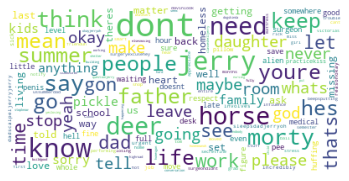

In [43]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate("".join(data[data['name']=='Beth']['text'].apply(lambda a : " ".join(a))))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()